In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
file_path = 'DAFNI-impacts.csv'
df = pd.read_csv(file_path)

# Cleaning column names
df.columns = df.columns.str.strip()

# Selecting independent variables (net_secs, net_i, net_j) and dependent variables (CkDiffRoad, CkDiffRail, CkDiffBus)
X = df[['net_secs', 'net_i', 'net_j']].dropna()  # Independent variables
y_road = df['CkDiffRoad'].dropna()  # Dependent variable for road
y_rail = df['CkDiffRail'].dropna()  # Dependent variable for rail
y_bus = df['CkDiffBus'].dropna()  # Dependent variable for bus

# Ensuring X and y have the same length after dropping missing values
X, y_road = X.align(y_road, join='inner', axis=0)
X, y_rail = X.align(y_rail, join='inner', axis=0)
X, y_bus = X.align(y_bus, join='inner', axis=0)

# Function to train and evaluate a Random Forest model
def train_evaluate_rf(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=1000, random_state=84)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return y_test, y_pred, mse, r2

In [2]:
# Training and evaluating models for each dependent variable
y_test_road, y_pred_road, mse_road, r2_road = train_evaluate_rf(X, y_road)
y_test_rail, y_pred_rail, mse_rail, r2_rail = train_evaluate_rf(X, y_rail)
y_test_bus, y_pred_bus, mse_bus, r2_bus = train_evaluate_rf(X, y_bus)


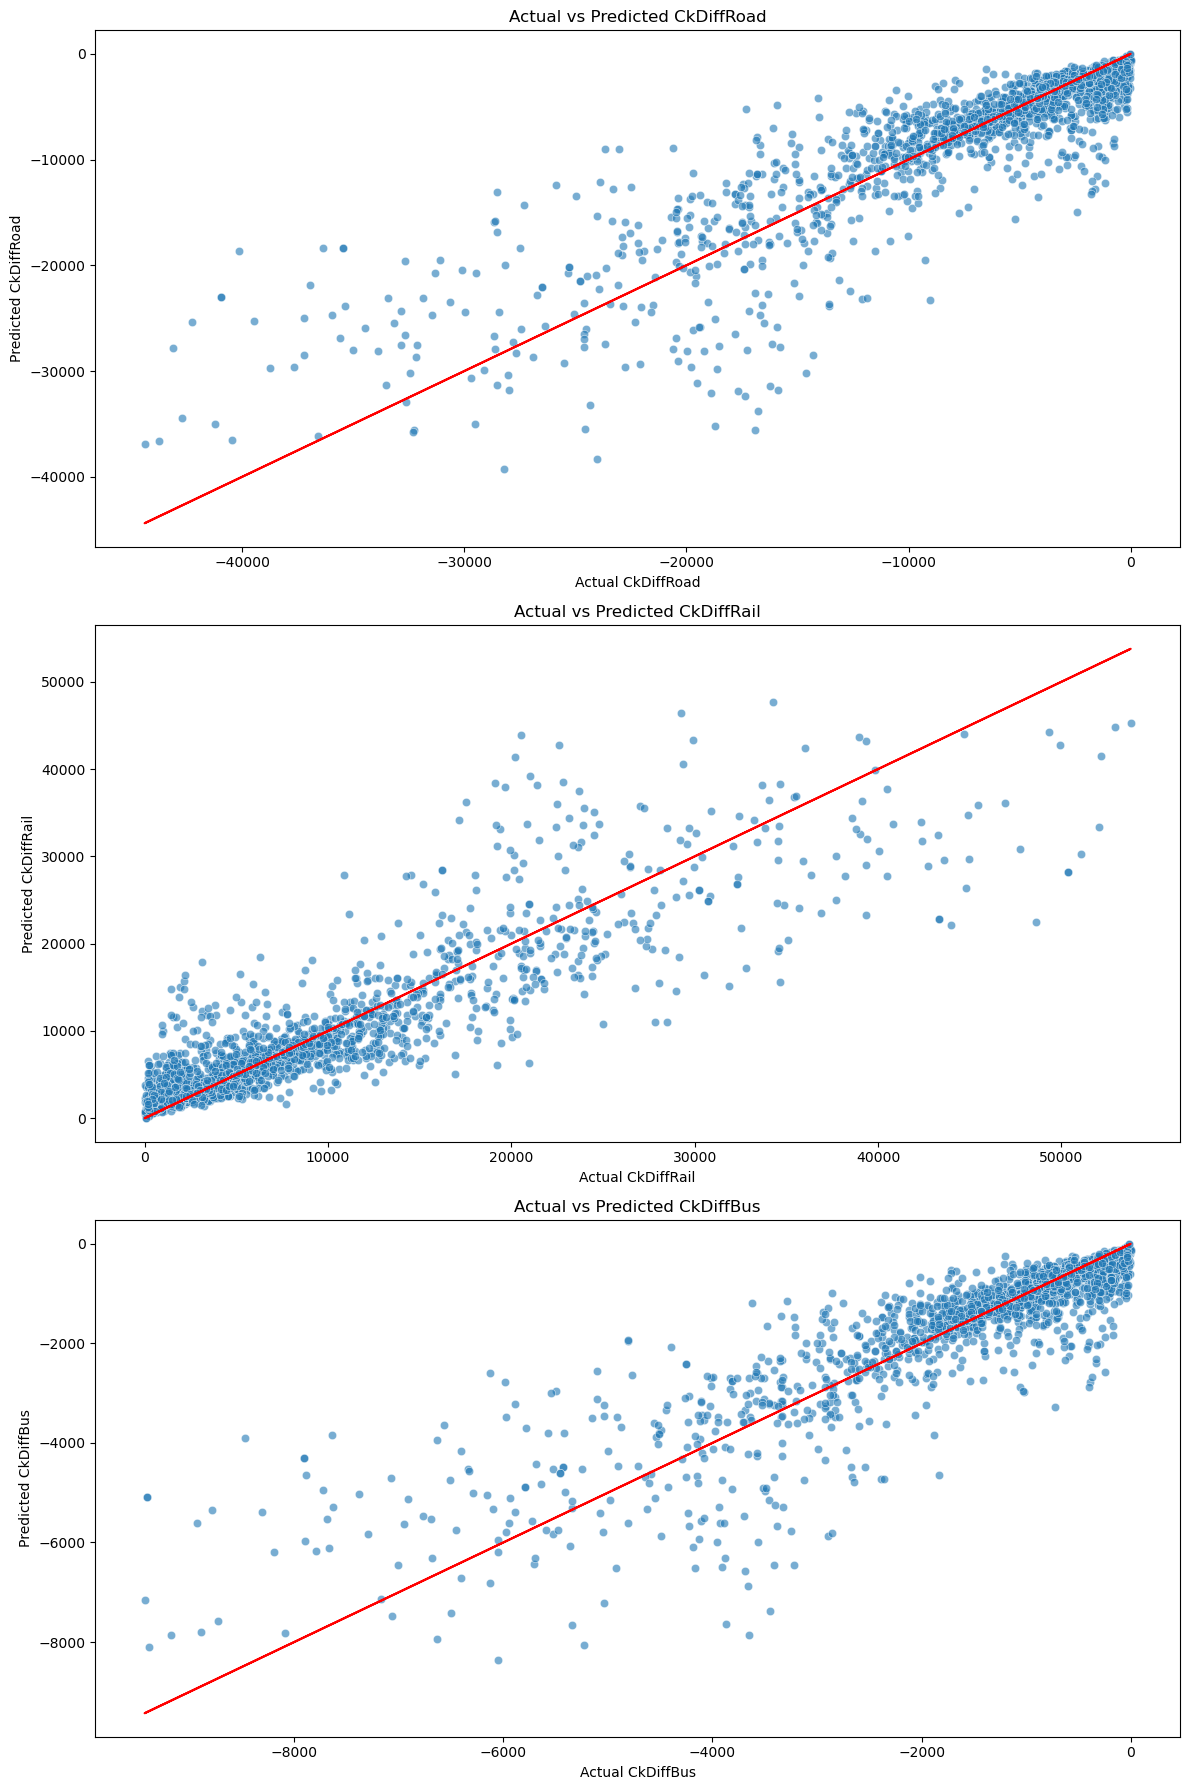

(12373062.67491941,
 0.7822653256711533,
 18018320.80114648,
 0.7822289752730197,
 531412.3958560183,
 0.7823261327544199)

In [3]:
# Visualizing the results
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Road
sns.scatterplot(x=y_test_road, y=y_pred_road, ax=axes[0], alpha=0.6)
axes[0].plot(y_test_road, y_test_road, color='red')  # Ideal line
axes[0].set_title('Actual vs Predicted CkDiffRoad')
axes[0].set_xlabel('Actual CkDiffRoad')
axes[0].set_ylabel('Predicted CkDiffRoad')

# Rail
sns.scatterplot(x=y_test_rail, y=y_pred_rail, ax=axes[1], alpha=0.6)
axes[1].plot(y_test_rail, y_test_rail, color='red')  # Ideal line
axes[1].set_title('Actual vs Predicted CkDiffRail')
axes[1].set_xlabel('Actual CkDiffRail')
axes[1].set_ylabel('Predicted CkDiffRail')

# Bus
sns.scatterplot(x=y_test_bus, y=y_pred_bus, ax=axes[2], alpha=0.6)
axes[2].plot(y_test_bus, y_test_bus, color='red')  # Ideal line
axes[2].set_title('Actual vs Predicted CkDiffBus')
axes[2].set_xlabel('Actual CkDiffBus')
axes[2].set_ylabel('Predicted CkDiffBus')

plt.tight_layout()
plt.show()

mse_road, r2_road, mse_rail, r2_rail, mse_bus, r2_bus

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 加载数据集
file_path = 'ScenarioData/OneDrive_1_2-25-2024/OiDj_merged_16w.csv'  # 请根据你的文件路径进行修改
df = pd.read_csv(file_path)

# 特征和目标变量选择
features = df[['Oi_net_i', 'Dj_net_i', 'Oi_net_j', 'Dj_net_j', 'net_secs']]
target = df['CkDiffRoad']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 网格搜索优化的参数范围
param_grid = {
    'n_estimators': [100, 200,500,1000],  
    'max_depth': [None, 10, 20,50,100],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
}

# 初始化网格搜索
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=84),
                           param_grid=param_grid,
                           cv=3,  # 交叉验证折数
                           n_jobs=-1,  # 使用所有可用的CPU核心
                           verbose=2)

# 执行网格搜索
grid_search.fit(X_train, y_train)

# 最优参数
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# 使用最优参数重新训练模型
best_model = grid_search.best_estimator_

# 预测测试集
y_pred = best_model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 打印评估结果
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")


Fitting 3 folds for each of 80 candidates, totalling 240 fits


KeyboardInterrupt: 